In [ ]:


from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
NUM_CLASSES = 2

train_path = '/content/drive/MyDrive/chest_xray/chest_xray/train'
valid_path = '/content/drive/MyDrive/chest_xray/chest_xray/test'

In [ ]:
model = Sequential()
model.add(ResNet50V2(include_top=False, pooling='max', weights='imagenet'))
model.add(Dense(NUM_CLASSES, activation='softmax'))
# ResNet-50 model is already trained, should not be trained
model.layers[0].trainable = True

94683136/94668760 [==============================] - 2s 0us/step


In [ ]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='max', weights='imagenet'))
model.add(Dense(NUM_CLASSES, activation='softmax'))
# ResNet-50 model is already trained, should not be trained
model.layers[0].trainable = True

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_1 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
train_path = '/content/drive/MyDrive/chest_xray/chest_xray/train'
valid_path = '/content/drive/MyDrive/chest_xray/chest_xray/test'

In [ ]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/chest_xray/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/chest_xray/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 624 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
  
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
163/163 [==============================] - 1284s 8s/step - loss: 2.6177 - accuracy: 0.8995 - val_loss: 1171.9969 - val_accuracy: 0.6250
Epoch 2/5
163/163 [==============================] - 171s 1s/step - loss: 0.6099 - accuracy: 0.9231 - val_loss: 266.1230 - val_accuracy: 0.6250
Epoch 3/5
163/163 [==============================] - 170s 1s/step - loss: 0.1347 - accuracy: 0.9479 - val_loss: 292.3207 - val_accuracy: 0.6250
Epoch 4/5
163/163 [==============================] - 169s 1s/step - loss: 0.2269 - accuracy: 0.9408 - val_loss: 108.7548 - val_accuracy: 0.6282
Epoch 5/5
163/163 [==============================] - 167s 1s/step - loss: 0.1749 - accuracy: 0.9509 - val_loss: 154.0579 - val_accuracy: 0.6346


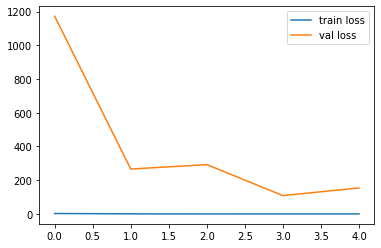

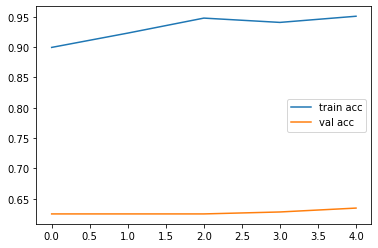

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('model_ResNet50.h5')